# Importar Librerias

In [1]:
import numpy as np
import ast
import math
import pandas as pd
import missingno as msno
#from tqdm.notebook import tqdm
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import logging
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
spacy_loggers = logging.getLogger('spacy-loggers')
transformers_logger.setLevel(logging.WARNING)

In [2]:
import torch, transformers, tokenizers
torch.__version__, transformers.__version__, tokenizers.__version__

('1.11.0', '4.17.0', '0.12.1')

# Load Data

In [3]:
movies_training = pd.read_csv("./Competencia/datos/dataTraining.csv", sep="," , index_col=0)
movies_training.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [4]:
movies_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7895 entries, 3107 to 215
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    7895 non-null   int64  
 1   title   7895 non-null   object 
 2   plot    7895 non-null   object 
 3   genres  7895 non-null   object 
 4   rating  7895 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 370.1+ KB


In [5]:
type(movies_training['genres'].iloc[0])

str

# Data Pre-Processing

In [6]:
movies_training['genres_process']=movies_training['genres'].apply(lambda x: ast.literal_eval(x))
movies_training

,year,title,plot,genres,rating,genres_process
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0,"[Short, Drama]"
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6,"[Comedy, Crime, Horror]"
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2,"[Drama, Film-Noir, Thriller]"
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4,[Drama]
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6,"[Action, Crime, Thriller]"
...,...,...,...,...,...,...
8417,2010,Our Family Wedding,""" our marriage , their wedding . "" it ' s l...","['Comedy', 'Romance']",4.9,"[Comedy, Romance]"
1592,1984,Conan the Destroyer,"the wandering barbarian , conan , alongside ...","['Action', 'Adventure', 'Fantasy']",5.8,"[Action, Adventure, Fantasy]"
1723,1955,Kismet,"like a tale spun by scheherazade , kismet fol...","['Adventure', 'Musical', 'Fantasy', 'Comedy', ...",6.4,"[Adventure, Musical, Fantasy, Comedy, Romance]"
7605,1982,The Secret of NIMH,"mrs . brisby , a widowed mouse , lives in a...","['Animation', 'Adventure', 'Drama', 'Family', ...",7.6,"[Animation, Adventure, Drama, Family, Fantasy,..."


In [7]:
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(movies_training['genres_process'])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [8]:
multilabel.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'], dtype=object)

In [9]:
tags = pd.DataFrame(y, columns= multilabel.classes_)
tags

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7891,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7892,0,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
7893,0,1,1,0,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [10]:
data = movies_training[['title', 'plot']].reset_index(drop=True)
data_train = pd.concat([data, tags], axis=1)
data_train.head()


,title,plot,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Most,most is the story of a single father who takes...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A Woman's Face,"in sweden , a female blackmailer with a disfi...",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,Executive Suite,"in a friday afternoon in new york , the presi...",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Narrow Margin,"in los angeles , the editor of a publishing h...",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Data Types

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7895 entries, 0 to 7894
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7895 non-null   object
 1   plot         7895 non-null   object
 2   Action       7895 non-null   int64 
 3   Adventure    7895 non-null   int64 
 4   Animation    7895 non-null   int64 
 5   Biography    7895 non-null   int64 
 6   Comedy       7895 non-null   int64 
 7   Crime        7895 non-null   int64 
 8   Documentary  7895 non-null   int64 
 9   Drama        7895 non-null   int64 
 10  Family       7895 non-null   int64 
 11  Fantasy      7895 non-null   int64 
 12  Film-Noir    7895 non-null   int64 
 13  History      7895 non-null   int64 
 14  Horror       7895 non-null   int64 
 15  Music        7895 non-null   int64 
 16  Musical      7895 non-null   int64 
 17  Mystery      7895 non-null   int64 
 18  News         7895 non-null   int64 
 19  Romance      7895 non-null 

<AxesSubplot:>

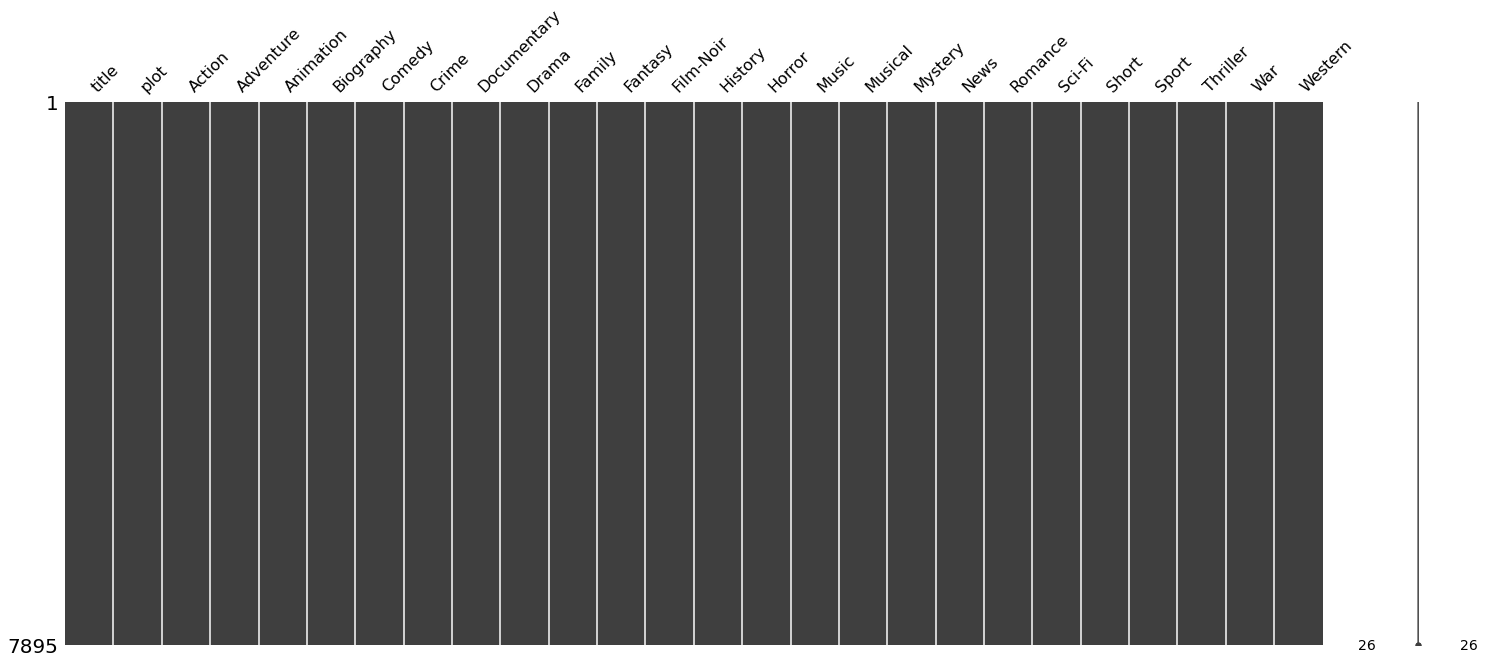

In [12]:
msno.matrix(data_train)


Se verifica que no hay valores perdidos

## Conversión de columnas categóricas

Convertimos todo el conjunto de características de género(salidas) en tipos categóricos.

In [13]:
category = data_train.columns.drop(['title', 'plot'])
for col in tags:
    data_train[col] = data_train[col].astype('category')

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7895 entries, 0 to 7894
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   title        7895 non-null   object  
 1   plot         7895 non-null   object  
 2   Action       7895 non-null   category
 3   Adventure    7895 non-null   category
 4   Animation    7895 non-null   category
 5   Biography    7895 non-null   category
 6   Comedy       7895 non-null   category
 7   Crime        7895 non-null   category
 8   Documentary  7895 non-null   category
 9   Drama        7895 non-null   category
 10  Family       7895 non-null   category
 11  Fantasy      7895 non-null   category
 12  Film-Noir    7895 non-null   category
 13  History      7895 non-null   category
 14  Horror       7895 non-null   category
 15  Music        7895 non-null   category
 16  Musical      7895 non-null   category
 17  Mystery      7895 non-null   category
 18  News         7895 non-null  

## Exploración Data

In [14]:
sum_genre = pd.DataFrame(tags[data_train.columns.drop(['title', 'plot'])].sum()).reset_index()
sum_genre.columns = ['Genre', 'Total']
sum_genre

,Genre,Total
0,Action,1303
1,Adventure,1024
2,Animation,260
3,Biography,373
4,Comedy,3046
5,Crime,1447
6,Documentary,419
7,Drama,3965
8,Family,682
9,Fantasy,707


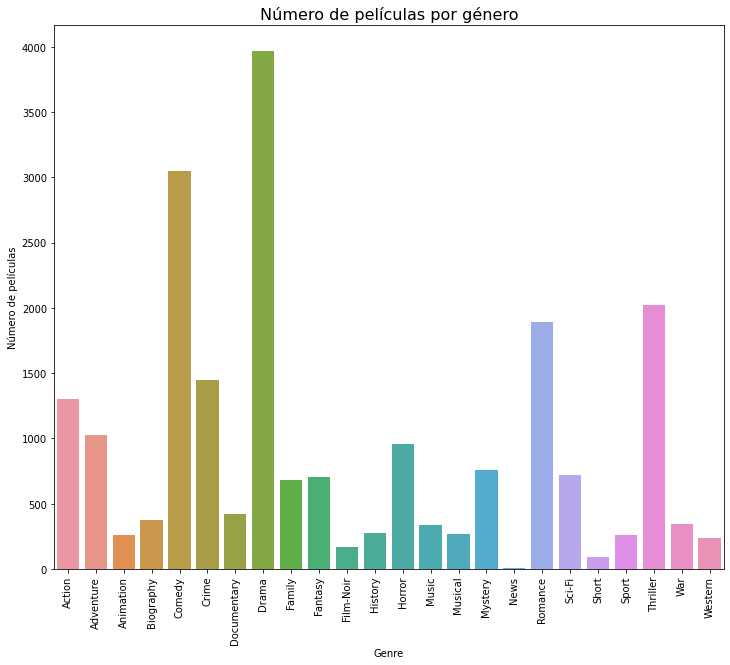

In [15]:
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(data=sum_genre, x='Genre', y='Total', axes=ax)
ax.set(ylabel='Número de películas')
plt.title('Número de películas por género', loc='center', fontdict={'fontsize':16})
plt.xticks(rotation=90)
plt.show()


Observaciones

* Las películas de género más bajas son Animation, Biography, Documentary, short and news.
* Las películas de género más altas son Drama (3965 películas), seguidas de Comedia (3046 películas) y Thriller (2024 películas )

In [16]:
data_train['labels'] = list(zip(data_train.Action.tolist(), data_train.Adventure.tolist(), 
                            data_train.Animation.tolist(), data_train.Biography.tolist(), 
                            data_train.Comedy.tolist(), data_train.Crime.tolist(),
                            data_train.Documentary.tolist(),data_train.Drama.tolist(),
                            data_train.Family.tolist(),data_train.Fantasy.tolist(),
                            data_train['Film-Noir'].tolist(),data_train.History.tolist(),
                            data_train.Horror.tolist(),data_train.Music.tolist(),
                            data_train.Musical.tolist(),data_train.Mystery.tolist(),
                            data_train.News.tolist(),data_train.Romance.tolist(),
                            data_train['Sci-Fi'].tolist(),data_train.Short.tolist(),
                            data_train.Sport.tolist(),data_train.Thriller.tolist(),
                            data_train.War.tolist(),data_train.Western.tolist()))
data_train['text'] = data_train['plot'].apply(lambda x: x.replace('\n', ' '))

data_train.head()

,title,plot,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,labels,text
0,Most,most is the story of a single father who takes...,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",most is the story of a single father who takes...
1,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,"(0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",a serial killer decides to teach the secrets o...
2,A Woman's Face,"in sweden , a female blackmailer with a disfi...",0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,"(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","in sweden , a female blackmailer with a disfi..."
3,Executive Suite,"in a friday afternoon in new york , the presi...",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,"(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","in a friday afternoon in new york , the presi..."
4,Narrow Margin,"in los angeles , the editor of a publishing h...",1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,"(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","in los angeles , the editor of a publishing h..."


In [17]:
from sklearn.model_selection import train_test_split


train_df, eval_df = train_test_split(data_train, test_size=0.2)

In [18]:
from simpletransformers.classification import MultiLabelClassificationModel
model = MultiLabelClassificationModel('bert', 'bert-base-cased', num_labels=24, args={'train_batch_size':64, 'gradient_accumulation_steps':16, 'learning_rate': 3e-5, 'num_train_epochs': 3, 'max_seq_length': 512, 'overwrite_output_dir': True}, use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMultiLabelSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultiLabelSequenceClassification were not in

In [19]:
# Train the model
model.train_model(train_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6316 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_512_0_2


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/99 [00:00<?, ?it/s]